#### Import the various libraries required to perform the exploratory data analysis and visualization of various feature values

The entire idea is to start with the data exploration look at which variables have an impact on the overall choice between self drive and autonomous vehicle acceptance. To get to that point we start with the text responses and encode the categorical data using a numeric scale starting from 0. The label column specifies the choice of a responder where self drive is considered 0 and autonomous vehicle acceptance is considered 1.

In [1]:
# this is a property which enforces the plots to be embedded inline
%matplotlib inline
# this is a cosmetic property controling the resoliution of the plot
%config InlineBackend.figure_format = 'retina'
import numpy as np # numpy library is for matrix math operations
import pandas as pd # pandas library is to access and manipulate the data using the dataframe
import matplotlib.pyplot as plt # matplotlib is to plot the data and draw visuals
import seaborn as sns # seaborn is a library for better visualisation

In [2]:
data_path = './text-survey-report-clean.csv' # data_path variable is used to define the path of the input data file

rawData = pd.read_csv(data_path) # rawdata is the dataframe we use to load the data

In [3]:
rawData.shape # shape will allow us to see the dimensions of the data

(250, 29)

In [4]:
rawData.describe() # describe would show the basic stats of the data in each column

,safety_perception,benefit_more_safe,benefit_lower_insurance,benefit_allows_multitasking,benefit_high_govt_safety_rating,benefit_self_drive_highways,benefit_self_drive_traffic,benefit_better_mileage,benefit_self_park_dropoff,new_feature_safety,new_feature_connectivity,new_feature_self_drive,new_feature_alternative_engine,trust_factor_brand_well_known,trust_factor_track_record,trust_factor_government_approval,trust_factor_friend_family_recommendation
count,249.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,237.000000,237.000000,237.000000,237.000000,234.000000,234.000000,234.000000,234.000000
mean,6.104418,3.719008,5.264463,3.768595,4.871901,4.202479,4.487603,5.661157,4.024793,1.670886,2.966245,2.270042,3.092827,2.564103,1.786325,2.764957,2.884615
std,2.414076,2.386766,1.912043,2.228671,2.343021,1.914217,2.023167,2.002296,2.655810,0.874132,0.822692,1.125056,0.999911,1.039021,0.882146,1.084563,1.119251
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,6.000000,3.000000,6.000000,4.000000,5.000000,4.000000,4.000000,6.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000
75%,8.000000,6.000000,7.000000,5.750000,7.000000,6.000000,6.000000,7.000000,7.000000,2.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,4.000000
max,10.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
rawData.dtypes # dtypes would show the datatype of each column used for the subsequent encoding

driving_preference                            object
safety_perception                            float64
automation_level                              object
likelyhood_partial_five                       object
likelyhood_auto_ten                           object
benefit_more_safe                            float64
benefit_lower_insurance                      float64
benefit_allows_multitasking                  float64
benefit_high_govt_safety_rating              float64
benefit_self_drive_highways                  float64
benefit_self_drive_traffic                   float64
benefit_better_mileage                       float64
benefit_self_park_dropoff                    float64
willingness_to_pay_extra                      object
new_feature_safety                           float64
new_feature_connectivity                     float64
new_feature_self_drive                       float64
new_feature_alternative_engine               float64
opinion_on_autonomous_vehicles                

In [6]:
rawData = rawData.drop('automation_level', axis=1) # dropping the automation level column as it is relatively 
# insignificant and users have made multiple entries and one hot encoding of this feature is irrelevant

# Replacing the labels of self drive and autonomous drive as 0 and 1 respectively
rawData['driving_preference'].replace({"Self-drive": 0, "Be driven by an autonomous car": 1}, inplace=True)

rawData.head() # going through the top records

,driving_preference,safety_perception,likelyhood_partial_five,likelyhood_auto_ten,benefit_more_safe,benefit_lower_insurance,benefit_allows_multitasking,benefit_high_govt_safety_rating,benefit_self_drive_highways,benefit_self_drive_traffic,...,trust_factor_brand_well_known,trust_factor_track_record,trust_factor_government_approval,trust_factor_friend_family_recommendation,level_of_concern,perceived_usefulness,age_group,legal_driver,distance_driven,gender
0,0.0,2.0,Somewhat unlikely,Neither likely nor unlikely,6.0,3.0,7.0,2.0,8.0,4.0,...,2.0,3.0,4.0,1.0,Very concerned,Probably yes,20-30 years,Yes,10000-20000 kilometers,Male
1,1.0,9.0,Extremely likely,Extremely likely,1.0,4.0,2.0,8.0,5.0,6.0,...,1.0,3.0,4.0,2.0,Moderately concerned,Definitely yes,30-40 years,Yes,0-5000 kilometers,Male
2,0.0,8.0,Extremely likely,Neither likely nor unlikely,7.0,8.0,2.0,5.0,1.0,4.0,...,4.0,2.0,3.0,1.0,Moderately concerned,Definitely yes,20-30 years,Yes,0-5000 kilometers,Female
3,0.0,8.0,Neither likely nor unlikely,Somewhat likely,4.0,7.0,6.0,5.0,2.0,1.0,...,2.0,3.0,1.0,4.0,Moderately concerned,Definitely yes,20-30 years,Yes,5000-10000 kilometers,Male
4,1.0,9.0,Somewhat likely,Somewhat likely,5.0,6.0,2.0,8.0,4.0,3.0,...,1.0,2.0,4.0,3.0,Moderately concerned,Definitely yes,20-30 years,Yes,5000-10000 kilometers,Male


In [7]:
# percentage of respondants accepting autonomous vehicle adoption by gender
rawData[["gender", "driving_preference"]].groupby(['gender'], as_index=False).mean().sort_values(by='driving_preference', ascending=False)

,gender,driving_preference
1,Male,0.490196
0,Female,0.489130


In [8]:
# percentage of respondants accepting autonomous vehicle adoption by age group
rawData[["age_group", "driving_preference"]].groupby(['age_group'], as_index=False).mean().sort_values(by='driving_preference', ascending=False)

,age_group,driving_preference
4,<20 years,0.750000
2,40-50 years,0.714286
1,30-40 years,0.527027
0,20-30 years,0.474576
5,>60 years,0.428571
3,50-60 years,0.250000


In [9]:
# percentage of respondants accepting autonomous vehicle adoption by driving experience
rawData[["distance_driven", "driving_preference"]].groupby(['distance_driven'], as_index=False).mean().sort_values(by='driving_preference', ascending=False)

,distance_driven,driving_preference
0,0-5000 kilometers,0.544118
2,5000-10000 kilometers,0.474576
1,10000-20000 kilometers,0.453125
3,>20000 kilometers,0.428571


In [10]:
# percentage of respondants accepting autonomous vehicle adoption by legal driver status
# (the respondent has a drivers license)
rawData[["legal_driver", "driving_preference"]].groupby(['legal_driver'], as_index=False).mean().sort_values(by='driving_preference', ascending=False)

,legal_driver,driving_preference
0,No,0.583333
1,Yes,0.485106


Text(0,0.5,'Safety Perception')

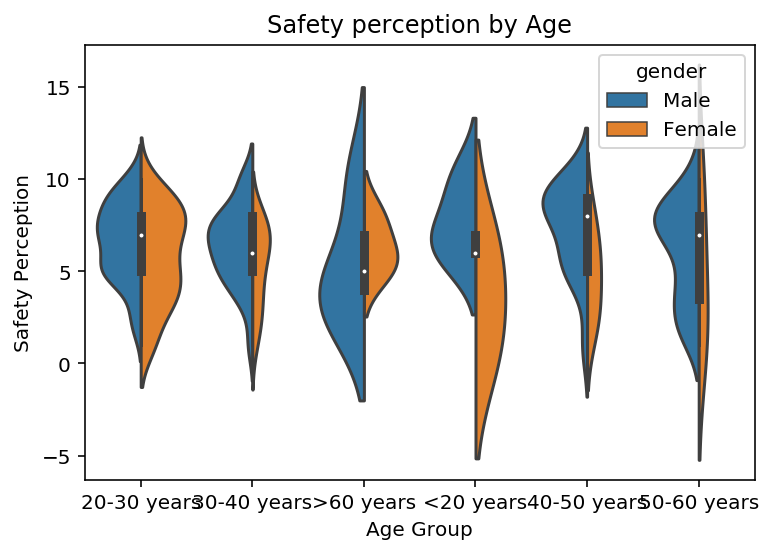

In [11]:
# Below is a violinplot - density plot representing the safety perception for different age groups
# The plot is shaded by gender
sns.violinplot('age_group', # Horizontal axis
               'safety_perception', # Vertical axis
               data=rawData, # Data source
               scale="count",
               hue="gender",
               split=True)

# Set title
plt.title('Safety perception by Age')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Safety Perception')

Text(0,0.5,'Safety Perception')

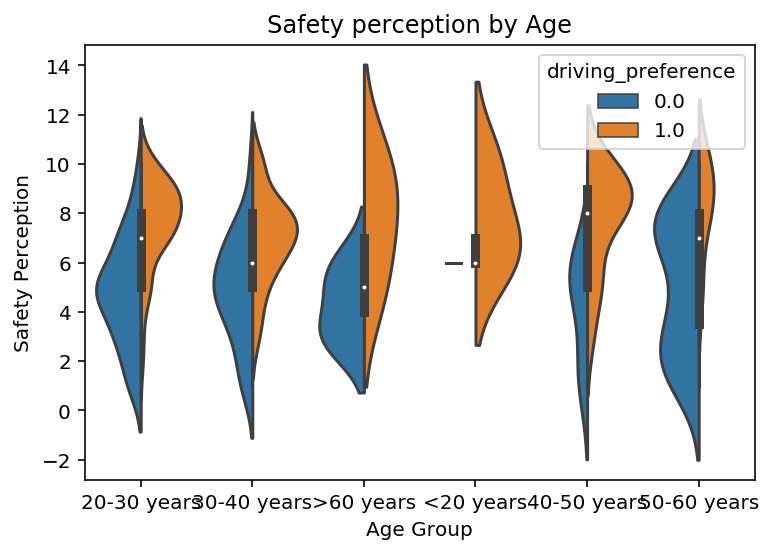

In [12]:
# Below is a violinplot - density plot representing the safety perception for different age groups
# The plot is shaded by label
sns.violinplot('age_group', # Horizontal axis
               'safety_perception', # Vertical axis
               data=rawData, # Data source
               scale="count",
               hue="driving_preference",
               split=True)

# Set title
plt.title('Safety perception by Age')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Safety Perception')

Text(0,0.5,'Readiness for Auto Drive')

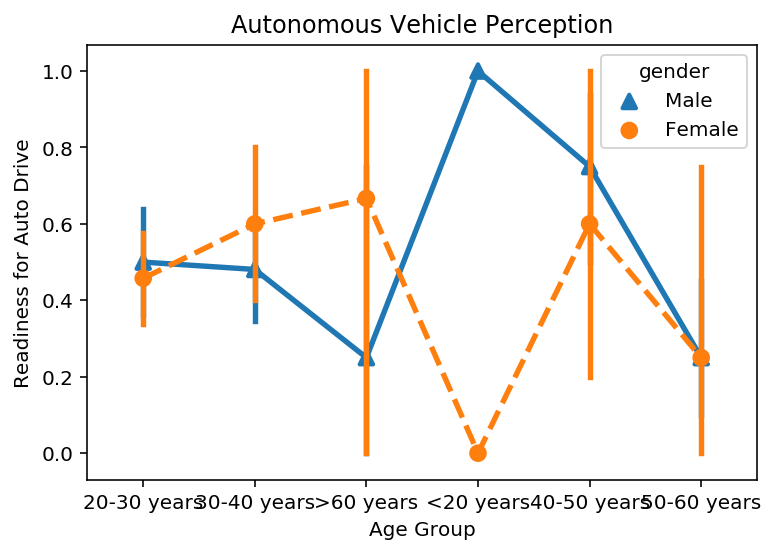

In [13]:
sns.pointplot(x="age_group", y="driving_preference", hue="gender", data=rawData,
              markers=["^", "o"], linestyles=["-", "--"])

# Set title
plt.title('Autonomous Vehicle Perception')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Readiness for Auto Drive')

In [14]:
# The following lines of code encodes categorical variables and maps them to numeric values for ease of calculation
# Replacing the likelyhood of consideration of smart cars in the next 5 and 10 years
rawData['likelyhood_partial_five'].replace({"Extremely likely": 4, "Somewhat likely": 3, "Neither likely nor unlikely": 2, "Somewhat unlikely": 1, "Extremely unlikely": 0}, inplace=True)
rawData['likelyhood_auto_ten'].replace({"Extremely likely": 4, "Somewhat likely": 3, "Neither likely nor unlikely": 2, "Somewhat unlikely": 1, "Extremely unlikely": 0}, inplace=True)

# Replacing the willingness to pay according to the order of magnitude
rawData['willingness_to_pay_extra'].replace({"$0-2500": 0, "$2500-5000": 1, "$5000-7500": 2, "$7500 & above": 3}, inplace=True)

# Replacing the opinion on self driving cars
rawData['opinion_on_autonomous_vehicles'].replace({"Fully-self driving cars will not be safe": 0, "I would trust a fully self-driving car to drive for me": 1, "Traveling in a fully self-driving car will be a positive experience": 2, "A fully self-driving car will free up my time and let me multitask": 3}, inplace=True)

# Replacing the level of concern
rawData['level_of_concern'].replace({"Very concerned": 2, "Moderately concerned": 1, "Slightly concerned": 0}, inplace=True)

# Replacing the perceived utility
rawData['perceived_usefulness'].replace({"Definitely yes": 4, "Probably yes": 3, "Might or might not": 2, "Probably not": 1, "Definitely not": 0}, inplace=True)

# Replacing the age group with number in descending order
rawData['age_group'].replace({">60 years": 0, "50-60 years": 1, "40-50 years": 2, "30-40 years": 3, "20-30 years": 4, "<20 years": 5}, inplace=True)

# Encoding the legal_driver status no - 0 and yes 1
rawData['legal_driver'].replace({"No": 0, "Yes": 1}, inplace=True)

# Encoding the distance driven from low to high
rawData['distance_driven'].replace({">20000 kilometers": 3, "10000-20000 kilometers": 2, "5000-10000 kilometers": 1, "0-5000 kilometers": 0}, inplace=True)

# Encoding the gender male - 0 and female 1
rawData['gender'].replace({"Male": 0, "Female": 1}, inplace=True)

In [15]:
cleanData = rawData.dropna()

In [16]:
cleanData.head()

,driving_preference,safety_perception,likelyhood_partial_five,likelyhood_auto_ten,benefit_more_safe,benefit_lower_insurance,benefit_allows_multitasking,benefit_high_govt_safety_rating,benefit_self_drive_highways,benefit_self_drive_traffic,...,trust_factor_brand_well_known,trust_factor_track_record,trust_factor_government_approval,trust_factor_friend_family_recommendation,level_of_concern,perceived_usefulness,age_group,legal_driver,distance_driven,gender
0,0.0,2.0,1,2,6.0,3.0,7.0,2.0,8.0,4.0,...,2.0,3.0,4.0,1.0,2.0,3.0,4.0,1.0,2.0,0.0
1,1.0,9.0,4,4,1.0,4.0,2.0,8.0,5.0,6.0,...,1.0,3.0,4.0,2.0,1.0,4.0,3.0,1.0,0.0,0.0
2,0.0,8.0,4,2,7.0,8.0,2.0,5.0,1.0,4.0,...,4.0,2.0,3.0,1.0,1.0,4.0,4.0,1.0,0.0,1.0
3,0.0,8.0,2,3,4.0,7.0,6.0,5.0,2.0,1.0,...,2.0,3.0,1.0,4.0,1.0,4.0,4.0,1.0,1.0,0.0
4,1.0,9.0,3,3,5.0,6.0,2.0,8.0,4.0,3.0,...,1.0,2.0,4.0,3.0,1.0,4.0,4.0,1.0,1.0,0.0


#### Further data munging
Now that we have converted the categorical variables into numbers which can meaningfully represent an individuals driving choice we need to work with the feature columns, the perceived value columns and the trust factor columns to normalize the ranks into fractions or percentages so that we can easily find the properties which increses the perceived value of the product and drives the customer decision

Rank to percentile conversion and normalization:
(100 / (highest rank - 1) * (highest rank - current rank)) / sum of all ranks (100 / (highest rank - 1) * (highest rank - current rank))

In [17]:
cleanData.head(), cleanData.shape

(   driving_preference  safety_perception  likelyhood_partial_five  \
 0                 0.0                2.0                        1   
 1                 1.0                9.0                        4   
 2                 0.0                8.0                        4   
 3                 0.0                8.0                        2   
 4                 1.0                9.0                        3   
 
    likelyhood_auto_ten  benefit_more_safe  benefit_lower_insurance  \
 0                    2                6.0                      3.0   
 1                    4                1.0                      4.0   
 2                    2                7.0                      8.0   
 3                    3                4.0                      7.0   
 4                    3                5.0                      6.0   
 
    benefit_allows_multitasking  benefit_high_govt_safety_rating  \
 0                          7.0                              2.0   
 1            

In [18]:
# Apply the above convertRank2Percent function and convert the feature columns,
# the perceived value columns and the trust factor columns 

In [19]:
# Define a function to convert a rank into a percentile and then we normalize by adding all the percentile
# values and multiplying the total with each percentile value to get a percentage fraction which adds up to 1
# then we multiply by 100 and return the value ** experiment with removing the 100 multiplier
def convertRank2Percent(rank, maxRank):
    total = 0.0
    percentile = (100 / (maxRank - 1)) * (maxRank - rank)
    for i in range(1, maxRank):
        total += (100/(maxRank-1))*(maxRank-i)
    return (percentile / total) * 100

In [20]:
convertRank2Percent(2, 8) # test of the convert function

21.428571428571427

In [21]:
cols = list(cleanData.columns)

def getGroup(cols, groupName):
    queryCols = [f for f in cols if not f.find(groupName) ]
    return queryCols

groupNames = ['benefit_', 'new_feature_', 'trust_']
queryColsListByGroup  = [getGroup(cols, queryTerm) for queryTerm in groupNames] 
queryColsListByGroup


[['benefit_more_safe',
  'benefit_lower_insurance',
  'benefit_allows_multitasking',
  'benefit_high_govt_safety_rating',
  'benefit_self_drive_highways',
  'benefit_self_drive_traffic',
  'benefit_better_mileage',
  'benefit_self_park_dropoff'],
 ['new_feature_safety',
  'new_feature_connectivity',
  'new_feature_self_drive',
  'new_feature_alternative_engine'],
 ['trust_factor_brand_well_known',
  'trust_factor_track_record',
  'trust_factor_government_approval',
  'trust_factor_friend_family_recommendation']]

In [22]:
def custom_apply_function(data, column, maxRank):
    return np.vectorize(convertRank2Percent, otypes=[np.float]) (data[[column]], maxRank)

def findMaxRank(queryColsList):
    maxRankInGroup = cleanData.filter(queryColsList)[:1].max(axis=1).values.max()
    return maxRankInGroup

def applyMagic(cleanData):
    for queryColsList in queryColsListByGroup:
        maxRank = findMaxRank(queryColsList)
        print('maxRank for group is: ' ,maxRank) # print the rank for each group ...
        for queryCol in queryColsList:
            cleanData[[queryCol]] =  custom_apply_function(cleanData, queryCol, int(maxRank))
    return

# Apply Magic... Pass the DataFrame to which we want to apply the function
applyMagic(cleanData)
  

maxRank for group is:  8.0


/home/debadyuti/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/debadyuti/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


maxRank for group is:  4.0
maxRank for group is:  4.0


In [23]:
cleanData.shape

(199, 28)

In [24]:
cleanData.head()

,driving_preference,safety_perception,likelyhood_partial_five,likelyhood_auto_ten,benefit_more_safe,benefit_lower_insurance,benefit_allows_multitasking,benefit_high_govt_safety_rating,benefit_self_drive_highways,benefit_self_drive_traffic,...,trust_factor_brand_well_known,trust_factor_track_record,trust_factor_government_approval,trust_factor_friend_family_recommendation,level_of_concern,perceived_usefulness,age_group,legal_driver,distance_driven,gender
0,0.0,2.0,1,2,7.142857,17.857143,3.571429,21.428571,0.000000,14.285714,...,33.333333,16.666667,0.000000,50.000000,2.0,3.0,4.0,1.0,2.0,0.0
1,1.0,9.0,4,4,25.000000,14.285714,21.428571,0.000000,10.714286,7.142857,...,50.000000,16.666667,0.000000,33.333333,1.0,4.0,3.0,1.0,0.0,0.0
2,0.0,8.0,4,2,3.571429,0.000000,21.428571,10.714286,25.000000,14.285714,...,0.000000,33.333333,16.666667,50.000000,1.0,4.0,4.0,1.0,0.0,1.0
3,0.0,8.0,2,3,14.285714,3.571429,7.142857,10.714286,21.428571,25.000000,...,33.333333,16.666667,50.000000,0.000000,1.0,4.0,4.0,1.0,1.0,0.0
4,1.0,9.0,3,3,10.714286,7.142857,21.428571,0.000000,14.285714,17.857143,...,50.000000,33.333333,0.000000,16.666667,1.0,4.0,4.0,1.0,1.0,0.0


Text(0,0.5,'Safety Perception')

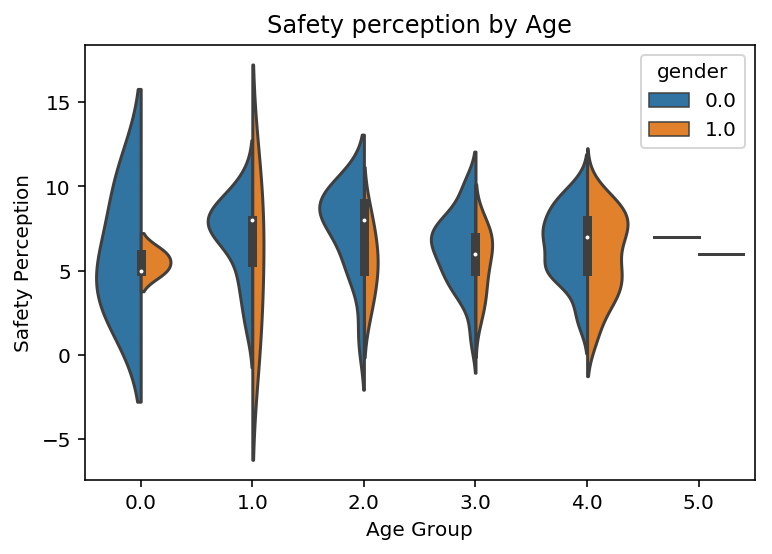

In [25]:
# Below is a violinplot - density plot representing the safety perception for different age groups
# The plot is shaded by gender
sns.violinplot('age_group', # Horizontal axis
               'safety_perception', # Vertical axis
               data=cleanData, # Data source
               scale="count",
               hue="gender",
               split=True)

# Set title
plt.title('Safety perception by Age')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Safety Perception')

Text(0,0.5,'Safety Perception')

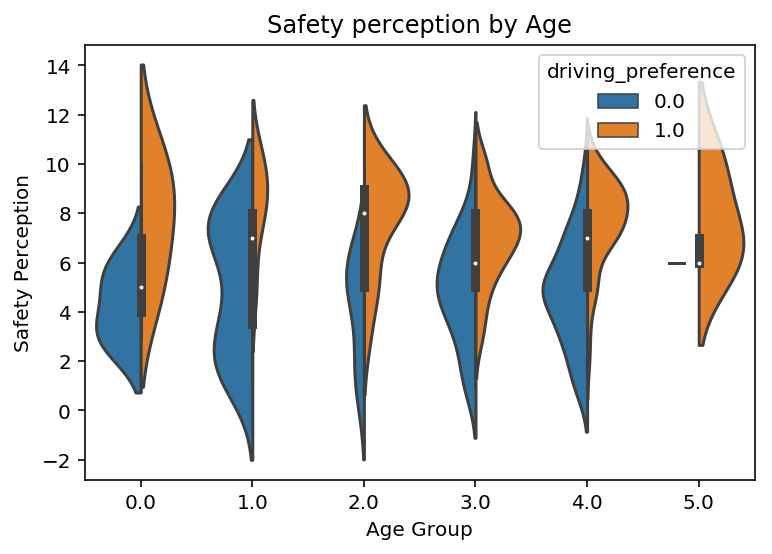

In [27]:
# Below is a violinplot - density plot representing the safety perception for different age groups
# The plot is shaded by label
sns.violinplot('age_group', # Horizontal axis
               'safety_perception', # Vertical axis
               data=rawData, # Data source
               scale="count",
               hue="driving_preference",
               split=True)

# Set title
plt.title('Safety perception by Age')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Safety Perception')

Text(0,0.5,'Perception')

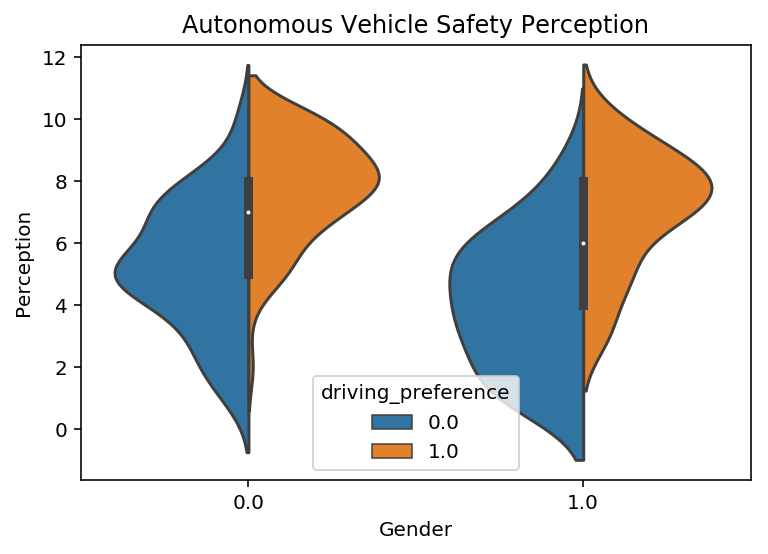

In [31]:
# Below is a violinplot - density plot representing the safety perception for different age groups
# The plot is shaded by label
sns.violinplot('gender', # Horizontal axis
               'safety_perception', # Vertical axis
               data=rawData, # Data source
               scale="count",
               hue="driving_preference",
               split=True)

# Set title
plt.title('Safety perception by Gender')

# Set x-axis label
plt.xlabel('gender')

# Set y-axis label
plt.ylabel('Safety Perception')

# Set title
plt.title('Autonomous Vehicle Safety Perception')

# Set x-axis label
plt.xlabel('Gender')

# Set y-axis label
plt.ylabel('Perception')

Text(0,0.5,'Readiness for Auto Drive')

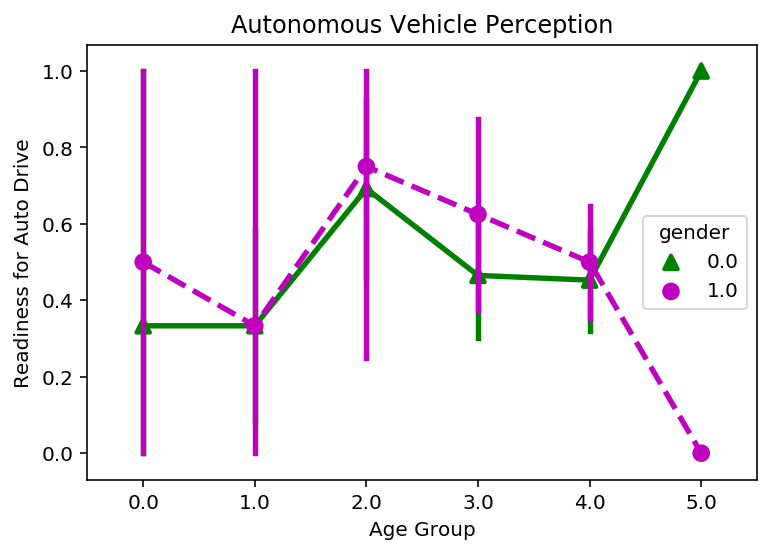

In [29]:
sns.pointplot(x="age_group", y="driving_preference", hue="gender", data=cleanData,
              palette={0: "g", 1: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

# Set title
plt.title('Autonomous Vehicle Perception')

# Set x-axis label
plt.xlabel('Age Group')

# Set y-axis label
plt.ylabel('Readiness for Auto Drive')

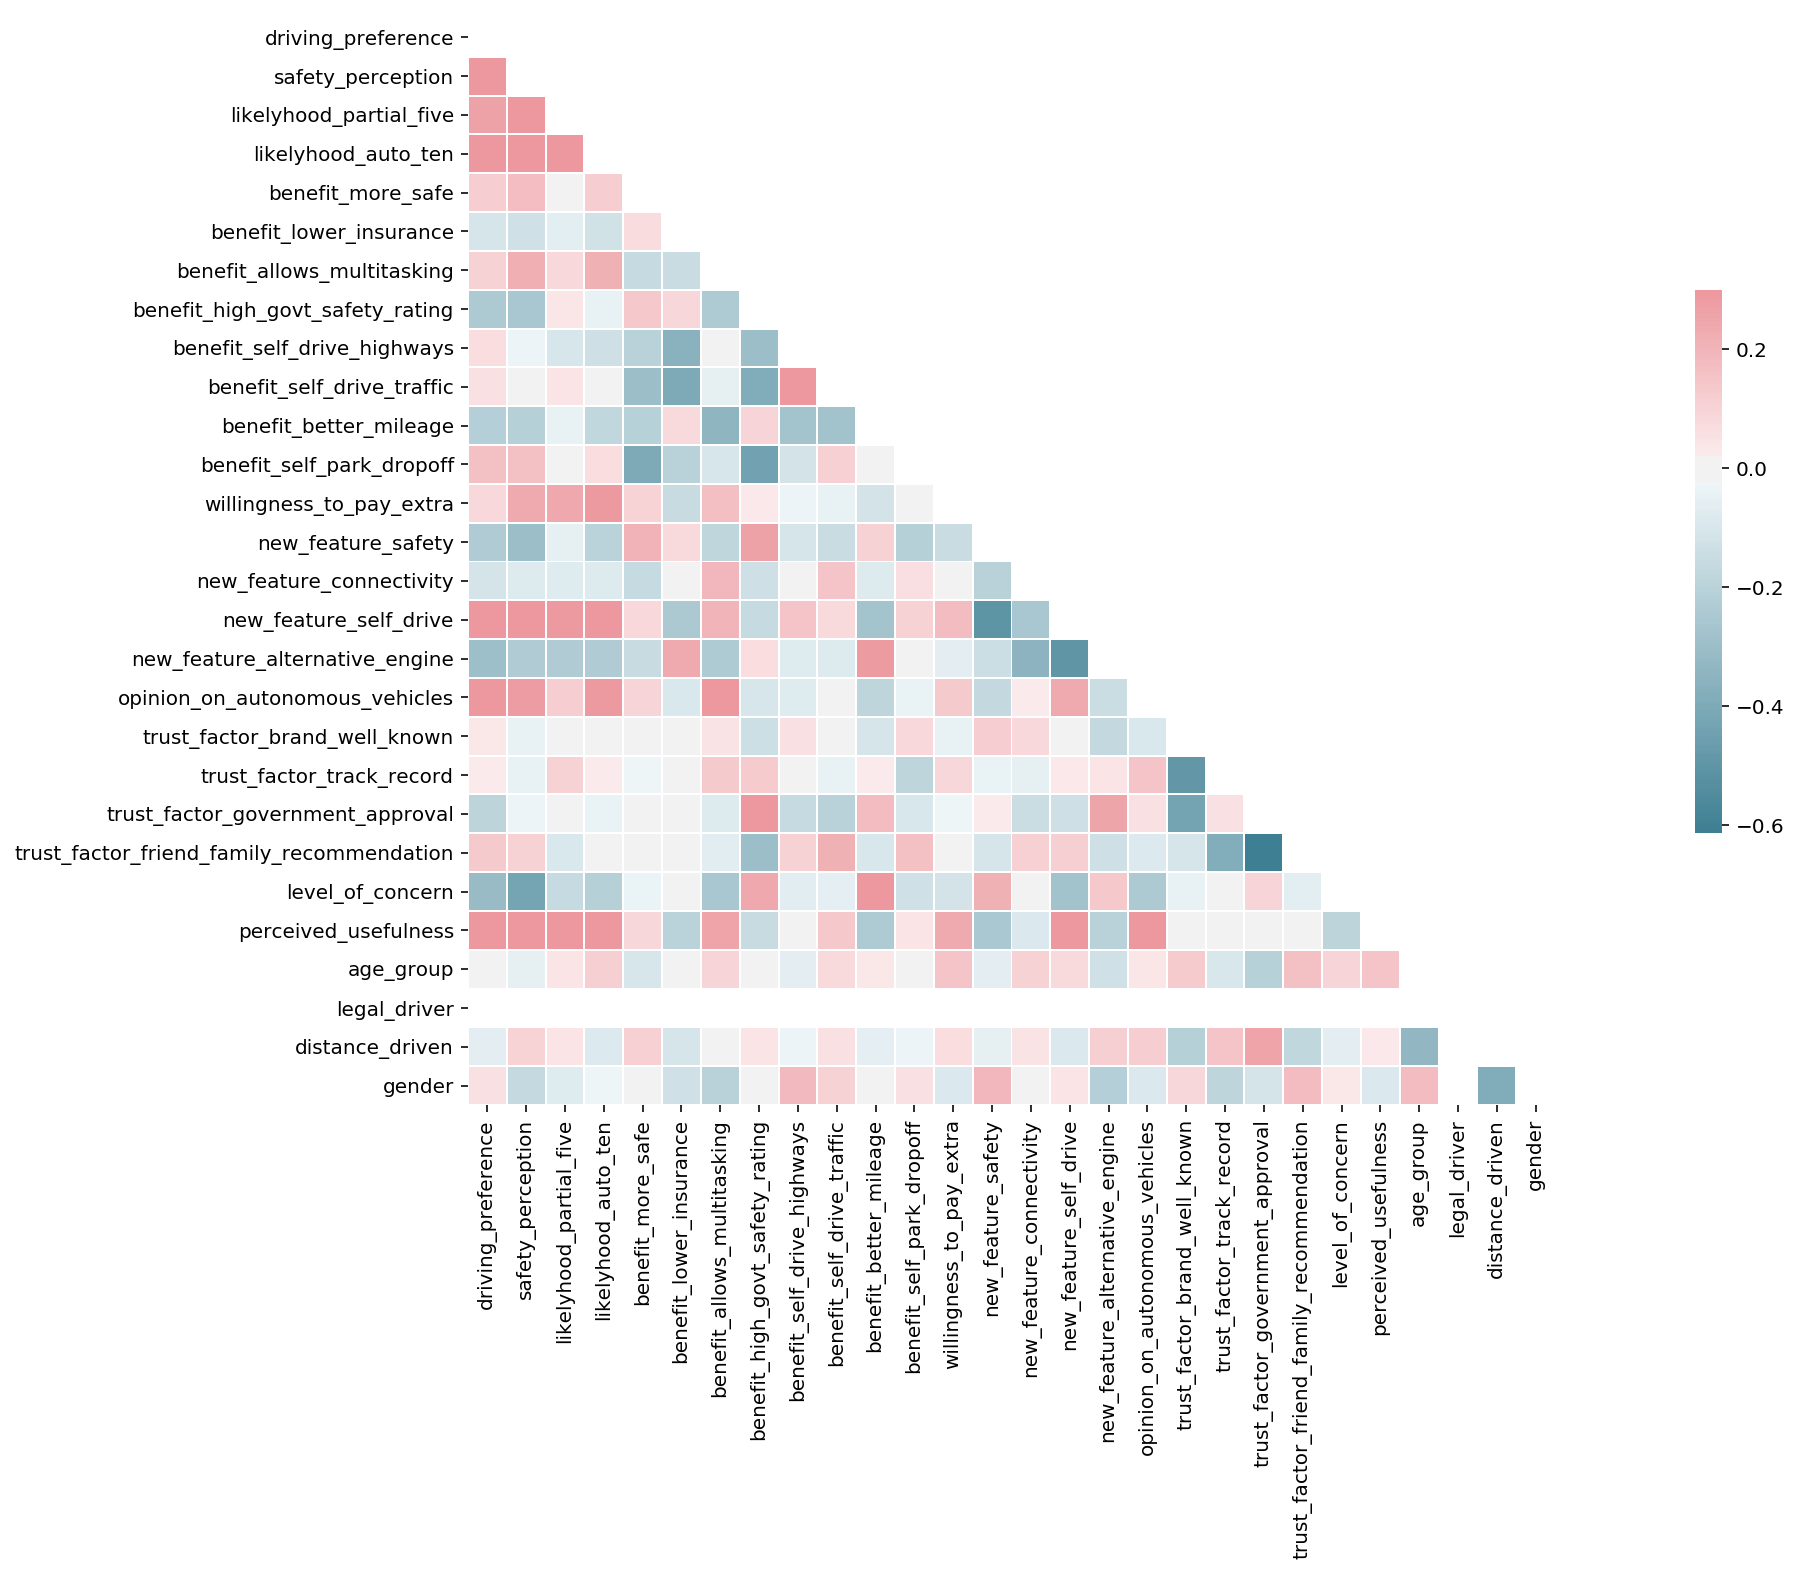

In [32]:
# Compute the correlation matrix
corr = cleanData.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Inferences from the above correlation plot

The above correlation plot clearly suggests that the label attribute or an individuals choice of an autonomous vehicle is positively correlated with perceived value of utility, safety perception, goverment regulations, safety rating etc.

# Model Prediction ...

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [34]:
cleanData.head()

,driving_preference,safety_perception,likelyhood_partial_five,likelyhood_auto_ten,benefit_more_safe,benefit_lower_insurance,benefit_allows_multitasking,benefit_high_govt_safety_rating,benefit_self_drive_highways,benefit_self_drive_traffic,...,trust_factor_brand_well_known,trust_factor_track_record,trust_factor_government_approval,trust_factor_friend_family_recommendation,level_of_concern,perceived_usefulness,age_group,legal_driver,distance_driven,gender
0,0.0,2.0,1,2,7.142857,17.857143,3.571429,21.428571,0.000000,14.285714,...,33.333333,16.666667,0.000000,50.000000,2.0,3.0,4.0,1.0,2.0,0.0
1,1.0,9.0,4,4,25.000000,14.285714,21.428571,0.000000,10.714286,7.142857,...,50.000000,16.666667,0.000000,33.333333,1.0,4.0,3.0,1.0,0.0,0.0
2,0.0,8.0,4,2,3.571429,0.000000,21.428571,10.714286,25.000000,14.285714,...,0.000000,33.333333,16.666667,50.000000,1.0,4.0,4.0,1.0,0.0,1.0
3,0.0,8.0,2,3,14.285714,3.571429,7.142857,10.714286,21.428571,25.000000,...,33.333333,16.666667,50.000000,0.000000,1.0,4.0,4.0,1.0,1.0,0.0
4,1.0,9.0,3,3,10.714286,7.142857,21.428571,0.000000,14.285714,17.857143,...,50.000000,33.333333,0.000000,16.666667,1.0,4.0,4.0,1.0,1.0,0.0


In [35]:
X_all = cleanData.drop(['driving_preference'], axis=1)
y_all = cleanData['driving_preference']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.5, random_state=23)

In [36]:
randomForest = RandomForestClassifier()
logisticRegression = LogisticRegression()

In [37]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
acc_scorer = make_scorer(accuracy_score)

## Predictions

In [40]:
predictionsRf = randomForest.predict(X_test)
print(accuracy_score(y_test, predictionsRf))

0.71


In [41]:
predictionsLr = logisticRegression.predict(X_test)
print(accuracy_score(y_test, predictionsLr))

0.7


## Coefficient & Intercept

In [42]:
logisticRegression.coef_

array([[ 7.85247711e-01,  5.13981849e-01,  1.00949492e+00,
         5.07212386e-02, -1.48786987e-01, -1.27922458e-01,
        -1.85033641e-02,  2.01269108e-01, -7.35939946e-02,
         6.44721632e-02, -1.15854160e-01, -2.20645778e-01,
        -1.10700846e-01,  1.31591013e-03, -4.75767758e-03,
        -5.40558415e-02,  8.35890932e-01, -1.17818033e-03,
        -6.50838229e-02, -9.03070778e-02, -1.16293736e-02,
        -6.68832858e-01,  1.96291512e+00, -7.85042812e-01,
        -1.68198455e-03, -8.54702085e-01,  1.44087264e-01]])

In [43]:
logisticRegression.intercept_

array([-0.00168198])

## Cross Validation

In [44]:
from sklearn.cross_validation import KFold

/home/debadyuti/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
def run_kfold(clf):
    kf = KFold(199, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

In [46]:
run_kfold(randomForest)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.9
Fold 3 accuracy: 0.7
Fold 4 accuracy: 0.65
Fold 5 accuracy: 0.75
Fold 6 accuracy: 0.7
Fold 7 accuracy: 0.5
Fold 8 accuracy: 0.7
Fold 9 accuracy: 0.75
Fold 10 accuracy: 0.8947368421052632
Mean Accuracy: 0.7344736842105263


In [47]:
run_kfold(logisticRegression)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.95
Fold 3 accuracy: 0.85
Fold 4 accuracy: 0.75
Fold 5 accuracy: 0.6
Fold 6 accuracy: 0.75
Fold 7 accuracy: 0.5
Fold 8 accuracy: 0.9
Fold 9 accuracy: 0.85
Fold 10 accuracy: 1.0
Mean Accuracy: 0.7949999999999999
